In [12]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

validation_set =keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
class_name = validation_set.class_names
print(class_name)

In [13]:
class_name=['Corn_Common_Rust', 'Corn_Gray_Leaf_Spot', 'Corn_Healthy', 'Corn_Northern_Leaf_Blight', 'Cotton_Aphids', 'Cotton_Army_Worm', 'Cotton_Bacterial_Blight', 'Cotton_Healthy', 'Cotton_Powdery_Mildew', 'Rice_Brown_Spot', 'Rice_Healthy', 'Rice_Leaf_Blast', 'Rice_Neck_Blast', 'Sugarcane_Bacterial_Blight', 'Sugarcane_Healthy', 'Sugarcane_Red_Rot', 'Wheat_Brown_Rust', 'Wheat_Healthy', 'Wheat_Yellow_Rust']

In [14]:
model = tf.keras.models.load_model('Strawhats/Trained_modelV1.keras')

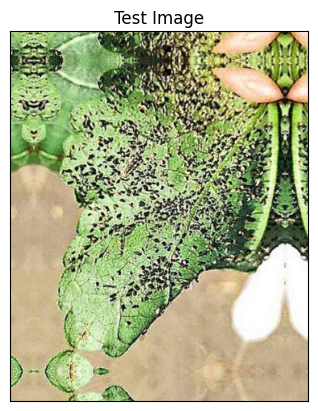

In [15]:
#Test Image Visualization
import cv2
image_path = '/Users/aranyabasu/Jupyter folder/test/Cotton_Aphids/aphids (9).jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [16]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


In [17]:
print(predictions)

[[5.1698668e-09 1.3018401e-05 5.0097628e-06 1.2857672e-06 9.0375787e-01
  2.2379506e-06 9.6143298e-02 3.2432428e-05 2.7643557e-05 8.2851138e-08
  3.0716481e-07 2.0446740e-09 1.2420330e-08 1.5229561e-07 6.4869987e-06
  7.8796369e-08 7.8032190e-06 1.3868379e-07 2.0805635e-06]]


In [18]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

4


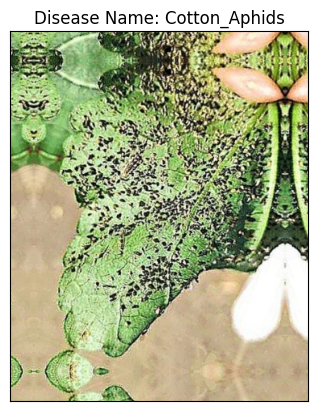

In [19]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()